/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


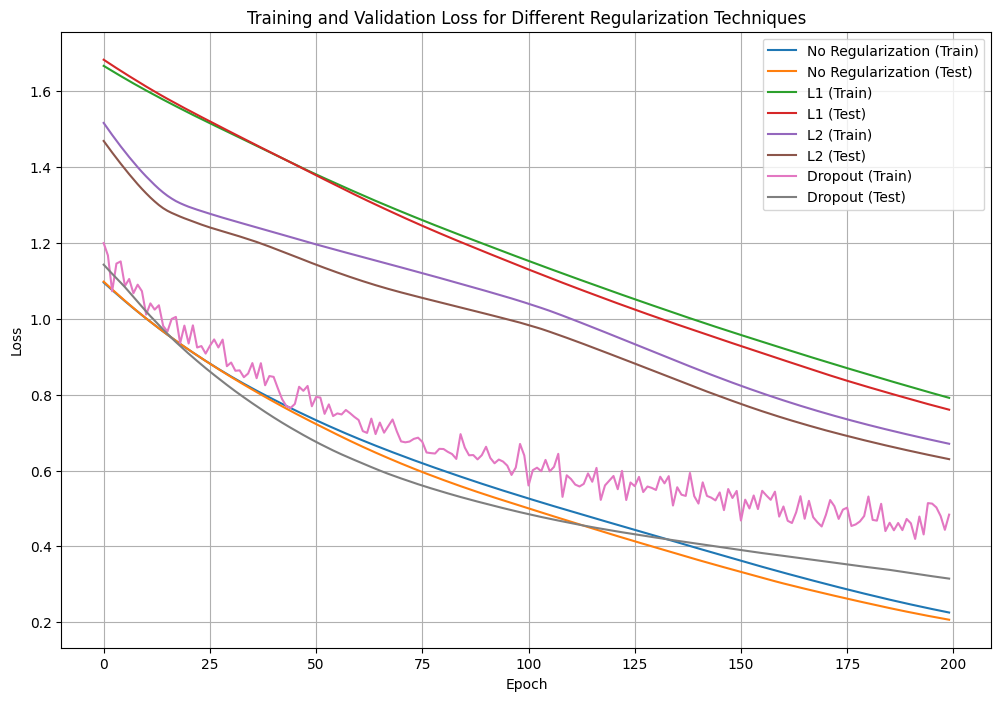

Iteration 1: Weight = -0.823977, Loss = 3.326894
Iteration 2: Weight = -0.787145, Loss = 3.193888
Iteration 3: Weight = -0.750715, Loss = 3.065003
Iteration 4: Weight = -0.714696, Loss = 2.940184
Iteration 5: Weight = -0.679099, Loss = 2.819374
Iteration 6: Weight = -0.643932, Loss = 2.702512
Iteration 7: Weight = -0.609203, Loss = 2.589535
Iteration 8: Weight = -0.574921, Loss = 2.480378
Iteration 9: Weight = -0.541094, Loss = 2.374971
Iteration 10: Weight = -0.507728, Loss = 2.273244
Iteration 11: Weight = -0.474830, Loss = 2.175124
Iteration 12: Weight = -0.442406, Loss = 2.080535
Iteration 13: Weight = -0.410462, Loss = 1.989402
Iteration 14: Weight = -0.379001, Loss = 1.901645
Iteration 15: Weight = -0.348030, Loss = 1.817185
Iteration 16: Weight = -0.317551, Loss = 1.735940
Iteration 17: Weight = -0.287567, Loss = 1.657828
Iteration 18: Weight = -0.258081, Loss = 1.582768
Iteration 19: Weight = -0.229095, Loss = 1.510675
Iteration 20: Weight = -0.200611, Loss = 1.441466
Iteration

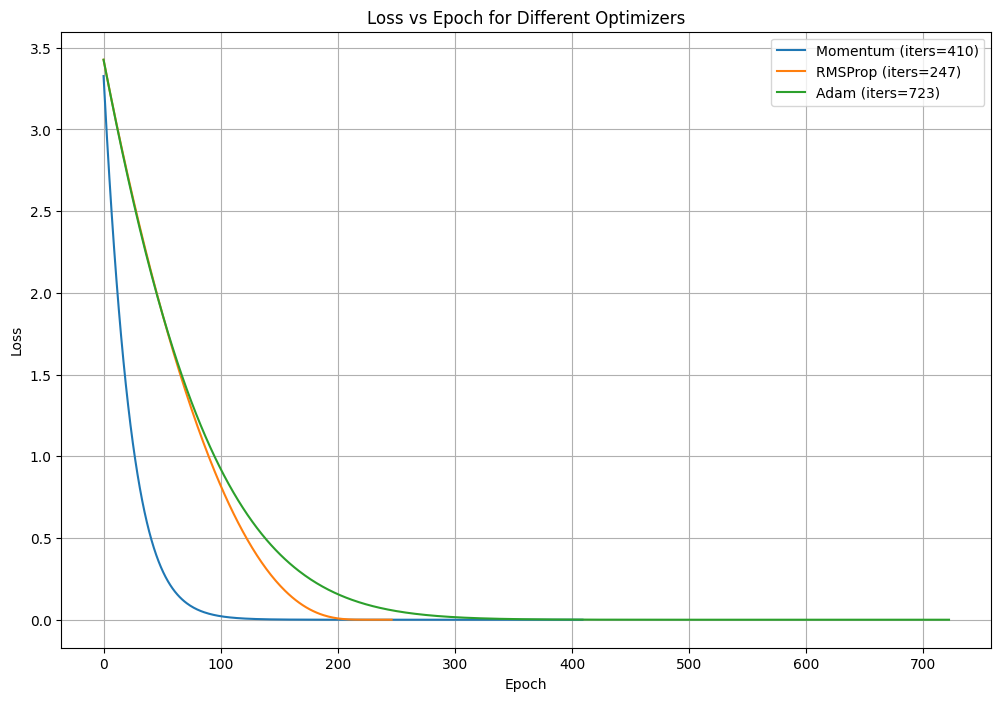


Optimizer Comparison:
Momentum: 410 iterations, final loss = 0.000000
RMSProp: 247 iterations, final loss = 0.000000
Adam: 723 iterations, final loss = 0.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2

# 1. Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to one-hot encoding
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(regularization=None, dropout=False):
    model = Sequential([
        Dense(16, activation='tanh', input_shape=(4,),
              kernel_regularizer=regularization),
        Dense(8, activation='tanh',
              kernel_regularizer=regularization),
        Dense(8, activation='relu',
              kernel_regularizer=regularization),
        Dense(3, activation='softmax')
    ])

    if dropout:
        model = Sequential([
            Dense(16, activation='tanh', input_shape=(4,)),
            Dropout(0.2),
            Dense(8, activation='tanh'),
            Dropout(0.2),
            Dense(8, activation='relu'),
            Dropout(0.2),
            Dense(3, activation='softmax')
        ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Train models with different regularization techniques
regularization_types = {
    'No Regularization': None,
    'L1': l1(0.01),
    'L2': l2(0.01),
    'Dropout': 'dropout'
}

histories = {}

for reg_name, reg in regularization_types.items():
    if reg == 'dropout':
        model = create_model(dropout=True)
    else:
        model = create_model(regularization=reg)

    history = model.fit(X_train, y_train,
                       epochs=200,
                       batch_size=512,
                       validation_data=(X_test, y_test),
                       verbose=0)
    histories[reg_name] = history.history

# Plot training curves
plt.figure(figsize=(12, 8))
for reg_name, history in histories.items():
    plt.plot(history['loss'], label=f'{reg_name} (Train)')
    plt.plot(history['val_loss'], label=f'{reg_name} (Test)')

plt.title('Training and Validation Loss for Different Regularization Techniques')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Custom Optimizer Implementation
class CustomOptimizers:
    def __init__(self):
        self.w = np.random.randn()
        self.b = np.random.randn()

    def loss_function(self, m):
        return m**2 - 2*m + 1

    def gradient(self, m):
        return 2*m - 2

    def momentum_optimizer(self, learning_rate=0.01, beta=0.9, max_iterations=1000):
        w = self.w
        v = 0
        losses = []

        for t in range(1, max_iterations + 1):
            grad = self.gradient(w)
            v = beta * v + (1 - beta) * grad
            v_corrected = v / (1 - beta**t)  # Bias correction
            w_prev = w
            w = w - learning_rate * v_corrected

            loss = self.loss_function(w)
            losses.append(loss)

            print(f"Iteration {t}: Weight = {w:.6f}, Loss = {loss:.6f}")

            if abs(w - w_prev) < 1e-6:
                break

        return losses, t

    def rmsprop_optimizer(self, learning_rate=0.01, beta=0.9, epsilon=1e-8, max_iterations=1000):
        w = self.w
        s = 0
        losses = []

        for t in range(1, max_iterations + 1):
            grad = self.gradient(w)
            s = beta * s + (1 - beta) * (grad**2)
            s_corrected = s / (1 - beta**t)  # Bias correction
            w_prev = w
            w = w - learning_rate * grad / (np.sqrt(s_corrected) + epsilon)

            loss = self.loss_function(w)
            losses.append(loss)

            print(f"Iteration {t}: Weight = {w:.6f}, Loss = {loss:.6f}")

            if abs(w - w_prev) < 1e-6:
                break

        return losses, t

    def adam_optimizer(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000):
        w = self.w
        m = 0
        v = 0
        losses = []

        for t in range(1, max_iterations + 1):
            grad = self.gradient(w)
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * (grad**2)

            m_corrected = m / (1 - beta1**t)  # Bias correction
            v_corrected = v / (1 - beta2**t)  # Bias correction

            w_prev = w
            w = w - learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)

            loss = self.loss_function(w)
            losses.append(loss)

            print(f"Iteration {t}: Weight = {w:.6f}, Loss = {loss:.6f}")

            if abs(w - w_prev) < 1e-6:
                break

        return losses, t

# Run optimizers and plot results
optimizers = CustomOptimizers()

momentum_losses, momentum_iters = optimizers.momentum_optimizer()
rmsprop_losses, rmsprop_iters = optimizers.rmsprop_optimizer()
adam_losses, adam_iters = optimizers.adam_optimizer()

plt.figure(figsize=(12, 8))
plt.plot(momentum_losses, label=f'Momentum (iters={momentum_iters})')
plt.plot(rmsprop_losses, label=f'RMSProp (iters={rmsprop_iters})')
plt.plot(adam_losses, label=f'Adam (iters={adam_iters})')
plt.title('Loss vs Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Compare optimizers
print("\nOptimizer Comparison:")
print(f"Momentum: {momentum_iters} iterations, final loss = {momentum_losses[-1]:.6f}")
print(f"RMSProp: {rmsprop_iters} iterations, final loss = {rmsprop_losses[-1]:.6f}")
print(f"Adam: {adam_iters} iterations, final loss = {adam_losses[-1]:.6f}")

Starting evaluation...

Evaluating VGG16 on cifar10
Loading cifar10 dataset...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16 on cifar10
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 427ms/step - accuracy: 0.0851 - loss: 2.3973 - val_accuracy: 0.1200 - val_loss: 2.2980
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.1122 - loss: 2.3048 - val_accuracy: 0.0750 - val_loss: 2.3112

Evaluating VGG19 on cifar10
Loading cifar10 dataset...
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG19 on cifar10
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.0890 - loss: 11.3138 - val_accuracy: 0.0900 - val_loss: 2.5749
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.0923 - loss: 2.3404 - val_accuracy: 0.1100 - val_loss: 2.3206

Evaluating ResNet50 on cifar10
Loading cifar10 dataset...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training ResNet50 on cifar10
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 901ms/step - accuracy


Evaluating ResNet50 on cifar100
Loading cifar100 dataset...
Training ResNet50 on cifar100
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 803ms/step - accuracy: 0.0436 - loss: 4.7667 - val_accuracy: 0.0100 - val_loss: 71.2604
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.1223 - loss: 4.0339 - val_accuracy: 0.0200 - val_loss: 94.0430



Evaluating VGG16 on mnist
Loading mnist dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16 on mnist
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.0960 - loss: 2.7362 - val_accuracy: 0.2200 - val_loss: 2.2703
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.1585 - loss: 2.2738 - val_accuracy: 0.1050 - val_loss: 2.5274

Evaluating VGG19 on mnist
Loading mnist dataset...
Training VGG19 on mnist
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.1094 - loss: 7.1806 - val_accuracy: 0.1050 - val_loss: 2.3109
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.0995 - loss: 2.3075 - val_accuracy: 0.0950 - val_loss: 2.3210

Evaluating ResNet50 on mnist
Loading mnist dataset...
Training ResNet50 on mnist
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 827ms/step - accuracy: 0.6354 - loss: 1.2566 - val_accuracy: 0.0850 - val_loss: 13.8577
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9460 - loss: 

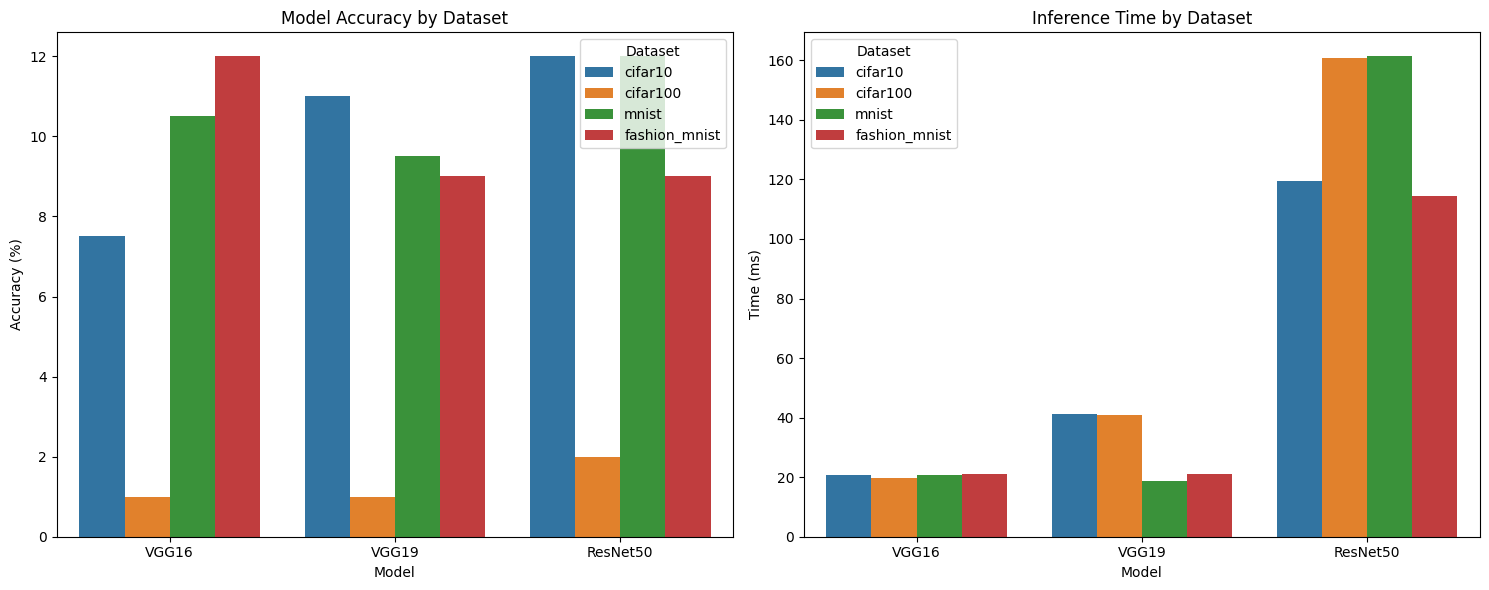


Model Comparison Summary:
   Model       Dataset  Accuracy  Inference Time (ms)
   VGG16       cifar10       7.5            20.878300
   VGG19       cifar10      11.0            41.132621
ResNet50       cifar10      12.0           119.588710
   VGG16      cifar100       1.0            19.656196
   VGG19      cifar100       1.0            40.841170
ResNet50      cifar100       2.0           160.892233
   VGG16         mnist      10.5            20.887680
   VGG19         mnist       9.5            18.859036
ResNet50         mnist      12.0           161.329538
   VGG16 fashion_mnist      12.0            20.906046
   VGG19 fashion_mnist       9.0            20.944998
ResNet50 fashion_mnist       9.0           114.578918


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.datasets import cifar10, cifar100, mnist, fashion_mnist
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import gc

# Configure GPU memory growth
try:
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
except:
    print("No GPU available or error in GPU configuration")

def load_dataset(dataset_name, sample_size=1000):  # Further reduced sample size
    print(f"Loading {dataset_name} dataset...")

    try:
        if dataset_name == 'cifar10':
            (x_train, y_train), (x_test, y_test) = cifar10.load_data()
            num_classes = 10
        elif dataset_name == 'cifar100':
            (x_train, y_train), (x_test, y_test) = cifar100.load_data()
            num_classes = 100
        elif dataset_name == 'mnist':
            (x_train, y_train), (x_test, y_test) = mnist.load_data()
            x_train = np.expand_dims(x_train, axis=-1)
            x_test = np.expand_dims(x_test, axis=-1)
            num_classes = 10
        else:  # fashion_mnist
            (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
            x_train = np.expand_dims(x_train, axis=-1)
            x_test = np.expand_dims(x_test, axis=-1)
            num_classes = 10

        # Sample subset of data
        indices = np.random.choice(len(x_train), sample_size, replace=False)
        x_train = x_train[indices]
        y_train = y_train[indices]

        test_indices = np.random.choice(len(x_test), sample_size//5, replace=False)
        x_test = x_test[test_indices]
        y_test = y_test[test_indices]

        # Convert grayscale to RGB
        if x_train.shape[-1] == 1:
            x_train = np.concatenate([x_train] * 3, axis=-1)
            x_test = np.concatenate([x_test] * 3, axis=-1)

        # Resize images (reduced size)
        x_train = tf.image.resize(x_train, (64, 64))
        x_test = tf.image.resize(x_test, (64, 64))

        # Preprocess
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)

        return (x_train, y_train), (x_test, y_test), num_classes

    except Exception as e:
        print(f"Error loading {dataset_name} dataset: {str(e)}")
        return None

def create_custom_model(input_shape, num_classes, model_name):
    try:
        if model_name == 'VGG16':
            base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
        elif model_name == 'VGG19':
            base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
        else:  # ResNet50
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(128, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = Model(inputs=base_model.input, outputs=predictions)
        return model

    except Exception as e:
        print(f"Error creating {model_name} model: {str(e)}")
        return None

def evaluate_model(model_name, dataset_name):
    print(f"\nEvaluating {model_name} on {dataset_name}")

    try:
        # Load dataset
        dataset_result = load_dataset(dataset_name)
        if dataset_result is None:
            return None

        (x_train, y_train), (x_test, y_test), num_classes = dataset_result

        # Create model
        input_shape = (64, 64, 3)
        model = create_custom_model(input_shape, num_classes, model_name)
        if model is None:
            return None

        # Compile model
        model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

        # Train model
        print(f"Training {model_name} on {dataset_name}")
        history = model.fit(x_train, y_train,
                          batch_size=32,
                          epochs=2,  # Reduced epochs
                          validation_data=(x_test, y_test),
                          verbose=1)

        # Evaluate
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

        # Measure inference time
        start_time = time.time()
        model.predict(x_test[:32], verbose=0)
        inference_time = (time.time() - start_time) / 32

        # Clear memory
        del model
        gc.collect()
        tf.keras.backend.clear_session()

        return {
            'Model': model_name,
            'Dataset': dataset_name,
            'Accuracy': accuracy * 100,
            'Inference Time (ms)': inference_time * 1000
        }

    except Exception as e:
        print(f"Error evaluating {model_name} on {dataset_name}: {str(e)}")
        return None

def run_evaluation():
    results = []
    models = ['VGG16', 'VGG19', 'ResNet50']
    datasets = ['cifar10', 'cifar100', 'mnist', 'fashion_mnist']

    for dataset_name in datasets:
        for model_name in models:
            result = evaluate_model(model_name, dataset_name)
            if result is not None:
                results.append(result)

    if not results:
        print("No results were generated. All evaluations failed.")
        return None

    return pd.DataFrame(results)

def plot_results(df):
    if df is None or df.empty:
        print("No data available for plotting")
        return

    plt.figure(figsize=(15, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x='Model', y='Accuracy', hue='Dataset')
    plt.title('Model Accuracy by Dataset')
    plt.ylabel('Accuracy (%)')

    # Inference time plot
    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x='Model', y='Inference Time (ms)', hue='Dataset')
    plt.title('Inference Time by Dataset')
    plt.ylabel('Time (ms)')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Starting evaluation...")
    results_df = run_evaluation()

    if results_df is not None:
        # Save results
        results_df.to_csv('model_comparison_results.csv', index=False)
        print("\nResults saved to 'model_comparison_results.csv'")

        # Plot results
        plot_results(results_df)

        # Print summary
        print("\nModel Comparison Summary:")
        print(results_df.to_string(index=False))
    else:
        print("Evaluation failed to produce results")